In [127]:
import pandas as pd
import numpy as np

In [128]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [129]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [130]:
df = df.dropna(how='any')


In [131]:
df.shape

(2011, 10)

In [132]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [134]:
scaler = MinMaxScaler()
array = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(array, columns=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                                            'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'])
df_scaled.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,0.497984,0.502267,0.384500,0.489383,0.580133,0.407644,0.490098,0.500973,0.499476,0.403282
std,0.114238,0.133835,0.153865,0.135038,0.117050,0.146292,0.134035,0.139289,0.154685,0.490678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.425647,0.423434,0.272304,0.404565,0.507435,0.299173,0.400057,0.410452,0.395048,0.000000
50%,0.493723,0.507286,0.366982,0.490199,0.577314,0.402079,0.488659,0.502198,0.499168,0.000000
75%,0.568195,0.586226,0.478240,0.572493,0.654291,0.508867,0.583836,0.595331,0.607399,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
# Preparing variables
X = df_scaled.drop(['Potability'], axis = 1)
y = df_scaled['Potability']

In [136]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [137]:
pca = PCA(n_components=0.90)

water_pca = pca.fit_transform(X)

In [138]:
# df of reduced dataset
pca_df = pd.DataFrame(
        data=water_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']
)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.013254,-0.098917,-0.090778,-0.207686,-0.228338,-0.131890,0.155430,0.102146
1,-0.015909,-0.054235,-0.051433,0.257325,0.105491,0.090283,-0.108549,0.075273
2,0.004424,0.296703,-0.296077,0.042920,0.116331,0.183266,-0.125711,-0.054863
3,-0.139632,0.286179,-0.213236,-0.046343,-0.222730,0.040819,0.034899,0.291701
4,-0.056638,-0.110390,0.133617,0.087051,-0.105835,-0.007793,-0.208308,0.003920


In [139]:
pca_df = pd.concat([pca_df, pd.DataFrame(y)] , axis = 1)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Potability
0,-0.013254,-0.098917,-0.090778,-0.207686,-0.228338,-0.131890,0.155430,0.102146,0.0
1,-0.015909,-0.054235,-0.051433,0.257325,0.105491,0.090283,-0.108549,0.075273,0.0
2,0.004424,0.296703,-0.296077,0.042920,0.116331,0.183266,-0.125711,-0.054863,0.0
3,-0.139632,0.286179,-0.213236,-0.046343,-0.222730,0.040819,0.034899,0.291701,0.0
4,-0.056638,-0.110390,0.133617,0.087051,-0.105835,-0.007793,-0.208308,0.003920,0.0


In [140]:
import seaborn as sb
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='PC1', ylabel='PC5'>

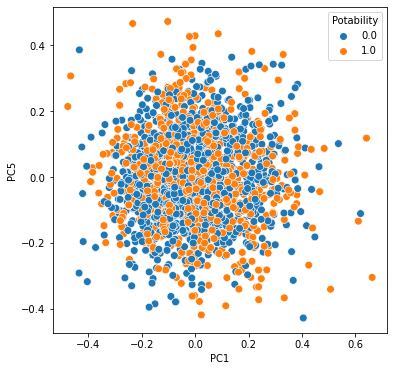

In [141]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = pca_df , x = 'PC1',y = 'PC5' , hue = 'Potability' , s = 60)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1111, stratify=y) 

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,roc_curve,accuracy_score, classification_report

In [144]:
k = range(1,20,1)
testing_accuracy = []
training_accuracy = []

score = 0

# knn
for i in k:
    knn= KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2 )  
    knn.fit(X_train, y_train)  
    y_pred_train = knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score for PCA from KNN Model', score, 'Best K-Score', best_k)

Best Accuracy Score for PCA from KNN Model 0.6655629139072847 Best K-Score 17


In [145]:
from sklearn.svm import SVC

In [146]:
svm = SVC(kernel='rbf')

svm = svm.fit(X_train, y_train)

y_pred=svm.predict(X_test)
acc = accuracy_score(y_test,y_pred)

print('Best Accuracy Score for SVM', acc, 'model is able to succesfully predict on waterpotability with a value of ', acc)

Best Accuracy Score for SVM 0.6705298013245033 model is able to succesfully predict on waterpotability with a value of  0.6705298013245033


In [147]:
#This adds a column that states whether the sample was a train or test sample
X_test['TestOrTrain'] = 'Test'
X_train['TestOrTrain'] = 'Train'

#This adds the test and train results column
CombinedTest = pd.concat([X_test, y_test], axis=1, join="inner")
CombinedTrain = pd.concat([X_train, y_train], axis=1, join="inner")
dfs = [CombinedTest, CombinedTrain]




#Combines all new columns into one df
CombinedSVMResults = pd.concat(dfs)
CombinedSVMResults['SVM Test Score'] = acc

#Converts 0 & 1 to true/false
def potable(y):
    if y['Potability'] == 1:
        return True
    else:
        return False
CombinedSVMResults['Potability'] = CombinedSVMResults.apply(potable, axis=1)

#Filters dataframe to just three relevant columns and the index
CombinedSVMResults = CombinedSVMResults[['TestOrTrain', 'Potability','SVM Test Score']]
CombinedSVMResults = CombinedSVMResults.sort_index()
CombinedSVMResults.to_csv('SVM.csv')

<ipython-input-147-00dcd742cd67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['TestOrTrain'] = 'Test'
<ipython-input-147-00dcd742cd67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['TestOrTrain'] = 'Train'


In [118]:
CombinedSVMResults

,TestOrTrain,Potability,SVM Test Score
0,Train,False,0.67053
1,Train,False,0.67053
2,Train,False,0.67053
3,Test,False,0.67053
4,Train,False,0.67053
...,...,...,...
2006,Test,True,0.67053
2007,Train,True,0.67053
2008,Test,True,0.67053
2009,Train,True,0.67053


In [119]:
from sklearn.ensemble import RandomForestClassifier

<ipython-input-120-649e9f53b6ad>:15: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values, labels=labels)


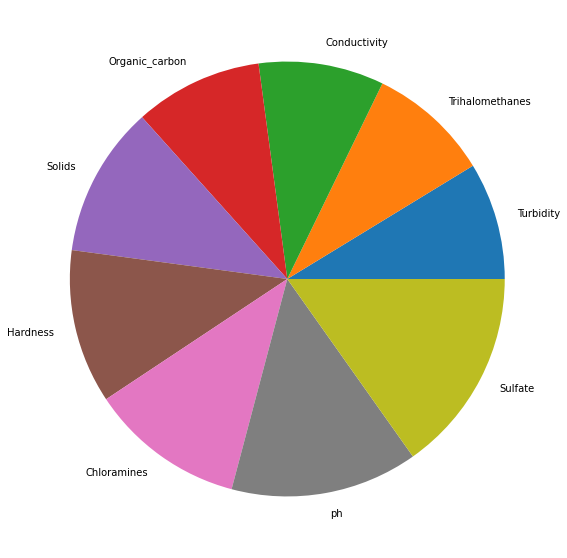

In [120]:
clasification = RandomForestClassifier()
clasification.fit(X,y)

variables = X.columns
importance = pd.DataFrame()

importance['Features'] = variables
importance['Importance'] = clasification.feature_importances_
importance = importance.sort_values(by=['Importance'],ascending=True)

labels = importance['Features']
values = importance['Importance']

plt.figure(figsize=(10,10))
plt.pie(values, labels=labels)
plt.show()

In [121]:
clf = RandomForestClassifier(random_state=1, n_estimators=6, bootstrap=True, max_samples=1000).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.8948116560056859
Testing Score: 0.6192052980132451


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
941,0.443572,0.134872,0.271494,0.465276,0.887956,0.324100,0.121670,0.347925,0.576162
531,0.547070,0.410688,0.271107,0.309114,0.572084,0.578227,0.360697,0.683612,0.358056
704,0.556388,0.437431,0.566866,0.543843,0.657000,0.259063,0.364678,0.448049,0.348796
473,0.607130,0.657119,0.123596,0.473958,0.397611,0.103785,0.273570,0.288967,0.513692
576,0.400728,0.451021,0.628694,0.398387,0.564036,0.276506,0.417180,0.536712,0.467490
...,...,...,...,...,...,...,...,...,...
1028,0.413029,0.823354,0.118338,0.739474,0.337032,0.216806,0.398770,0.267465,0.225155
157,0.504385,0.532782,0.357503,0.536032,0.449068,0.206499,0.497185,0.570325,0.493562
830,0.569622,0.560918,0.294162,0.630752,0.654818,0.648057,0.607238,0.521230,0.719997
775,0.450373,0.549885,0.472409,0.485427,0.497608,0.392950,0.633746,0.227332,0.665205


In [126]:
#This adds a column that states whether the sample was a train or test sample
X_test['TestOrTrain'] = 'Test'
X_train['TestOrTrain'] = 'Train'

#This adds the test and train results column
CombinedTest2 = pd.concat([X_test, y_test], axis=1, join="inner")
CombinedTrain2 = pd.concat([X_train, y_train], axis=1, join="inner")
dfs = [CombinedTest2, CombinedTrain2]




#Combines all new columns into one df
RandomForrestsResults = pd.concat(dfs)
RandomForrestsResults['SVM Test Score'] = acc

#Converts 0 & 1 to true/false
def potable(y):
    if y['Potability'] == 1:
        return True
    else:
        return False
RandomForrestsResults['Potability'] = RandomForrestsResults.apply(potable, axis=1)

#Filters dataframe to just three relevant columns and the index
RandomForrestsResults = RandomForrestsResults[['TestOrTrain', 'Potability','SVM Test Score']]
RandomForrestsResults = RandomForrestsResults.sort_index()
RandomForrestsResults.to_csv('RandomForrestsResults.csv')

<ipython-input-126-23a2a2a1578b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['TestOrTrain'] = 'Test'
<ipython-input-126-23a2a2a1578b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['TestOrTrain'] = 'Train'


[0.13864104 0.12209712 0.11532524 0.11969228 0.15745332 0.09679167
 0.07729195 0.07518811 0.09751926]


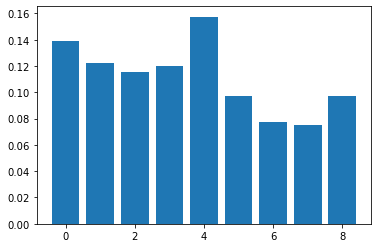

In [32]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [26]:
# Linear Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.003307546214617152
Testing Score: -0.00012429713451078683


In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [29]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [30]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.5970149253731343
Testing Data Score: 0.5960264900662252


In [148]:
#This adds a column that states whether the sample was a train or test sample
X_test['TestOrTrain'] = 'Test'
X_train['TestOrTrain'] = 'Train'

#This adds the test and train results column
CombinedTest3 = pd.concat([X_test, y_test], axis=1, join="inner")
CombinedTrain3 = pd.concat([X_train, y_train], axis=1, join="inner")
dfs = [CombinedTest3, CombinedTrain3]




#Combines all new columns into one df
LogisticRegression = pd.concat(dfs)
LogisticRegression['SVM Test Score'] = acc

#Converts 0 & 1 to true/false
def potable(y):
    if y['Potability'] == 1:
        return True
    else:
        return False
LogisticRegression['Potability'] = LogisticRegression.apply(potable, axis=1)

#Filters dataframe to just three relevant columns and the index
LogisticRegression = LogisticRegression[['TestOrTrain', 'Potability','SVM Test Score']]
LogisticRegression = LogisticRegression.sort_index()
LogisticRegression.to_csv('LogisticRegression.csv')

<ipython-input-148-5d43bb3f969f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['TestOrTrain'] = 'Test'
<ipython-input-148-5d43bb3f969f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['TestOrTrain'] = 'Train'
